# Introduction to Hierarchical Clustering and Dataset Analysis

## Hierarchical Clustering Overview
Hierarchical clustering is a powerful and versatile unsupervised machine learning technique used for grouping similar data points into clusters. Unlike many clustering techniques, hierarchical clustering does not require pre-specifying the number of clusters. Instead, it creates a tree-like structure of data, known as a dendrogram, representing the arrangement of data points into increasingly specific clusters. This method is particularly insightful for understanding the hierarchical grouping of data and is used extensively in various fields, including biology (for gene and protein sequencing), marketing (for customer segmentation), and social sciences (for social network analysis).

Hierarchical clustering algorithms are primarily of two types: agglomerative and divisive. Agglomerative is a bottom-up approach where each data point starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy. In contrast, divisive is a top-down approach where all points start in one cluster, and splits are performed recursively as one moves down the hierarchy. In this analysis, we will focus on the agglomerative approach due to its widespread application and interpretability.







## Dataset Overview
For our hierarchical clustering analysis, we will use the "Mall Customers" dataset. This dataset is a typical example used in market segmentation studies and offers a rich ground for clustering analysis. It includes various customer attributes such as customer ID, gender, age, annual income, and spending score. The spending score is a particularly interesting metric as it is assigned to the customer based on defined parameters like their behavior and purchasing data.

This dataset provides a perfect opportunity to explore customer segmentation based on different demographic and financial attributes. By applying hierarchical clustering, we can identify distinct groups within the mall customers, which can then be used to tailor marketing strategies, enhance customer engagement, and personalize customer experiences. The insights gained from this analysis are not only beneficial for targeted marketing campaigns but also for understanding the diverse customer base, their preferences, and spending patterns.

In our analysis, we will first preprocess the data, ensuring it is suitable for clustering. This includes handling any missing values, encoding categorical variables, and scaling features to ensure uniformity. We will then apply hierarchical clustering to the preprocessed data and visualize the results using dendrograms and scatter plots. These visualizations will help us understand the structure of the data and how customers group together based on their similarities. Finally, we will analyze the characteristics of each identified cluster to draw meaningful insights about the mall customers.

### 1. Load the Dataset
This step involves loading the dataset into a pandas DataFrame. It's the first step in any data analysis process.

In [6]:
import pandas as pd

# Load the dataset
file_path = 'Mall_Customers.csv'
df = pd.read_csv(file_path)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### 2. Applying Hierarchical Clustering
This step involves applying the hierarchical clustering algorithm to the dataset.

In [9]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Applying Hierarchical Clustering
linked = linkage(df_scaled, method='ward')

### 3. Cluster Label Assignment and Analysis
Assign cluster labels to each data point and analyze the characteristics of each cluster.

In [10]:
from scipy.cluster.hierarchy import fcluster

# Assigning clusters
clusters = fcluster(linked, t=5, criterion='distance')
df['Cluster'] = clusters

# Cluster Analysis
cluster_analysis = df.groupby('Cluster').mean()
cluster_analysis

<ipython-input-10-cda766caa23e>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_analysis = df.groupby('Cluster').mean()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,
1,171.000000,44.600000,92.333333,21.600000
2,159.500000,39.500000,85.150000,14.050000
3,163.333333,32.190476,86.047619,81.666667
4,160.444444,33.277778,87.111111,82.666667
5,90.000000,21.600000,56.900000,52.600000
6,23.153846,26.846154,25.615385,65.076923
7,19.272727,25.181818,23.727273,82.636364
8,84.434783,25.956522,54.217391,49.391304
9,20.600000,59.200000,24.800000,10.800000


### 4. Generating Plots for Cluster Analysis
Visualize the clustering results with various plots for a better understanding and interpretation

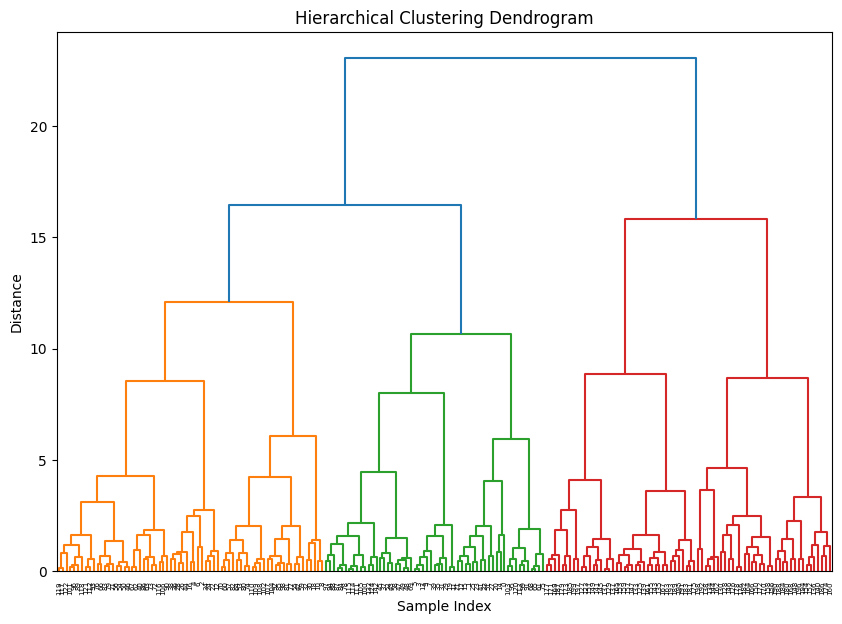

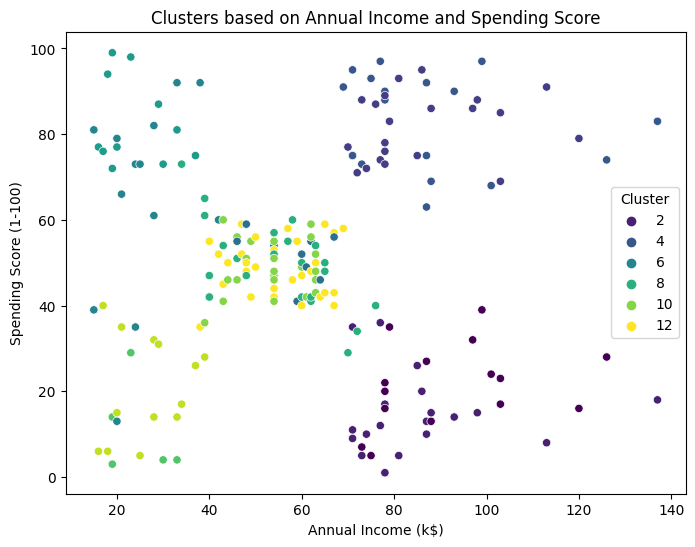

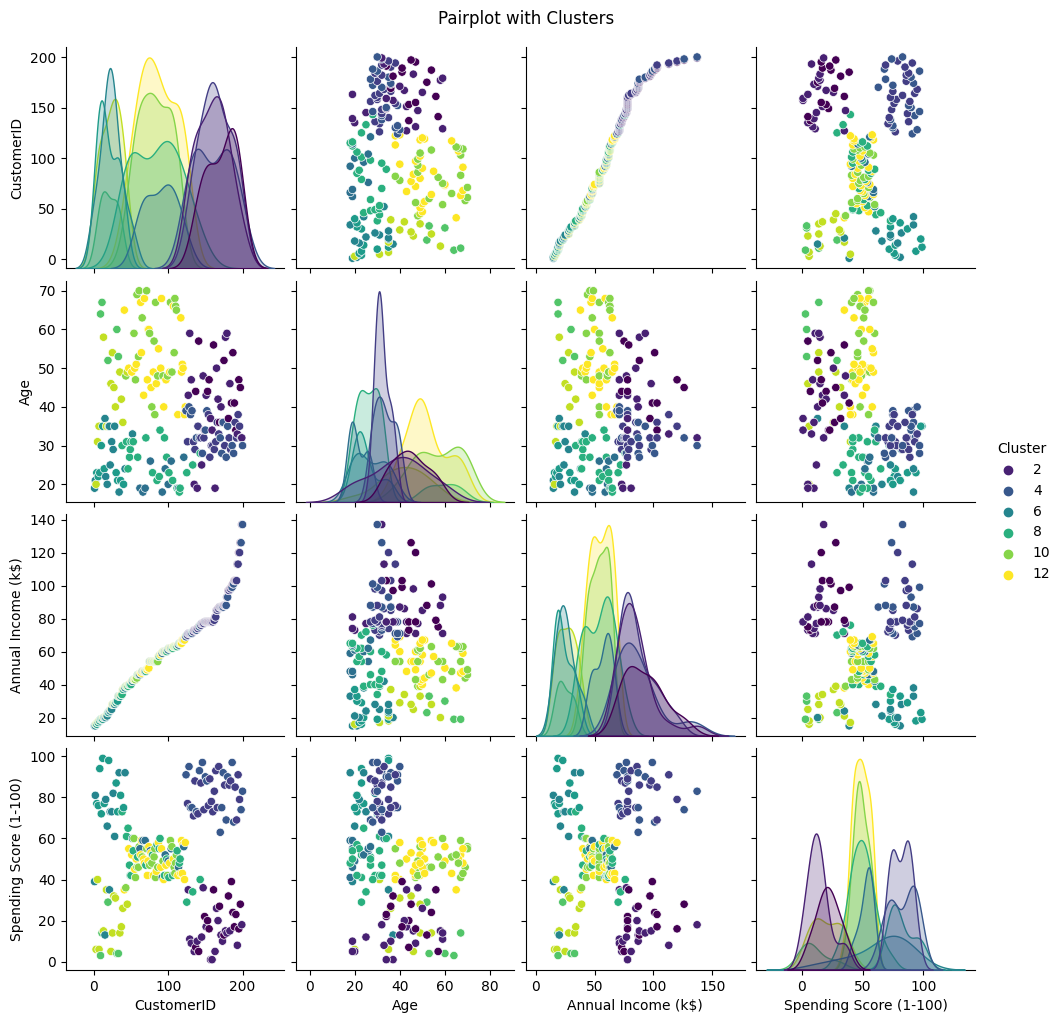

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the Dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Scatter plot of 'Annual Income' vs 'Spending Score' colored by clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis')
plt.title('Clusters based on Annual Income and Spending Score')
plt.show()

# Additional plots
# Pairplot for the entire dataset with cluster hue
sns.pairplot(df, hue='Cluster', palette='viridis')
plt.suptitle('Pairplot with Clusters', y=1.02)
plt.show()

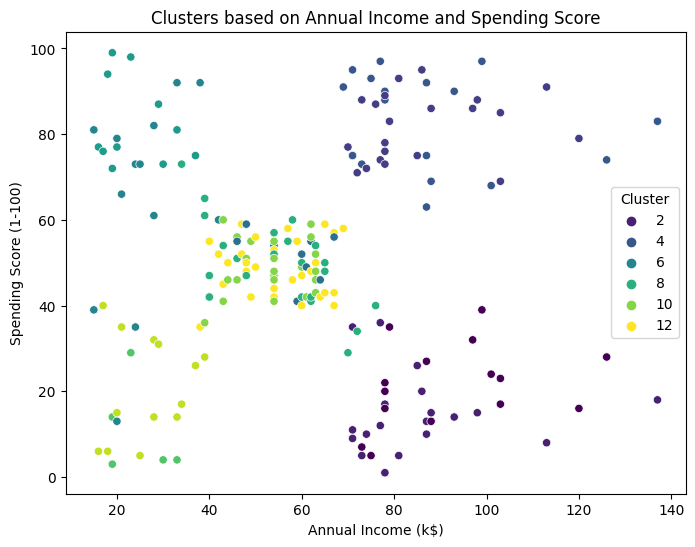

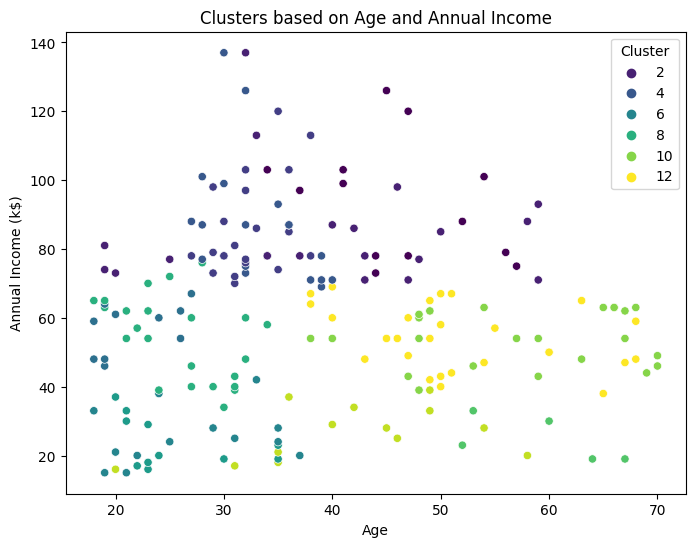

In [12]:
# Scatter plot of 'Annual Income' vs 'Spending Score' colored by clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis')
plt.title('Clusters based on Annual Income and Spending Score')
plt.show()

# Additional plots
# Plot of 'Age' vs 'Annual Income' colored by clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Annual Income (k$)', hue='Cluster', data=df, palette='viridis')
plt.title('Clusters based on Age and Annual Income')
plt.show()